Movie recomendation system



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
#loading dataset
col_name = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('/content/drive/My Drive/movie recomendation system/u.data', sep='\t', names=col_name)

Basic dataset info

In [3]:
data.shape

(100003, 4)

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
data['rating'].describe()

count    100003.000000
mean          3.529864
std           1.125704
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
print('basic info:')
print("#"*50)
print('total users:', len(data['user_id'].unique()))
print('total movies', len(data['item_id'].unique()))
print('total ratings:', data['rating'].shape[0])

basic info:
##################################################
total users: 944
total movies 1682
total ratings: 100003


In [8]:
data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [9]:
#load title corresponding to item id
title = pd.read_csv('/content/drive/My Drive/movie recomendation system/Movie_Id_Titles', index_col='item_id')

In [10]:
title.shape

(1682, 1)

In [11]:
title.head()

,title
item_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


Exploratory data analysis

In [12]:
#average movie rating
data.groupby('item_id')['rating'].mean().sort_values(ascending=False).head()

item_id
1293    5.0
1467    5.0
1653    5.0
814     5.0
1122    5.0
Name: rating, dtype: float64

In [13]:
#total movie rating
data.groupby('item_id')['rating'].count().sort_values(ascending=False).head()

item_id
50     584
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [14]:
#average user rating
data.groupby('user_id')['rating'].mean().sort_values(ascending=False).head()

user_id
849    4.869565
688    4.833333
507    4.724138
628    4.703704
928    4.687500
Name: rating, dtype: float64

In [15]:
#total user rating
data.groupby('user_id')['rating'].count().sort_values(ascending=False).head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

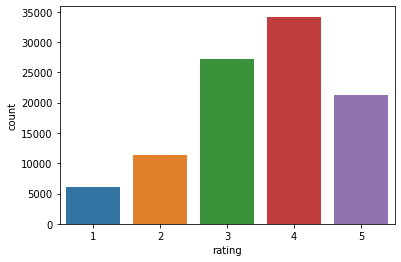

In [16]:
#distribution of ratings
sns.countplot('rating', data=data)
plt.show()

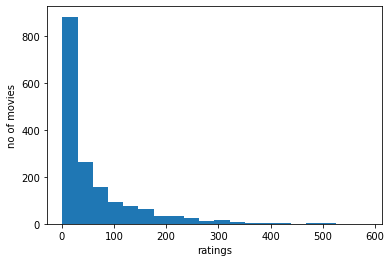

In [17]:
#distribution total rating of movies
plt.hist(data.groupby('item_id')['rating'].count(), bins=20)
plt.xlabel('ratings')
plt.ylabel('no of movies')
plt.show()

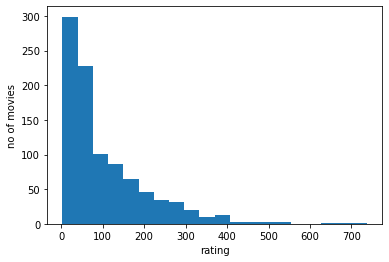

In [18]:
#distribution of toal ratings of users
plt.hist(data.groupby('user_id')['rating'].count(), bins=20)
plt.xlabel('rating')
plt.ylabel('no of movies')
plt.show()

train and test split

In [19]:
data.sort_values(by='timestamp', ascending=True, inplace=True)

In [20]:
data.head()

,user_id,item_id,rating,timestamp
217,259,255,4,874724710
83968,259,286,4,874724727
43030,259,298,4,874724754
21399,259,185,4,874724781
82658,259,173,4,874724843


In [21]:
train = data.loc[:int(data.shape[0]*0.70)]
test = data.loc[int(data.shape[0]*0.70):]

In [22]:
train.shape

(64804, 4)

In [23]:
test.shape

(35200, 4)

In [24]:
print('train:')
print('no of users:', len(train['user_id'].unique()))
print('no of movies:', len(train['item_id'].unique()))
print('no of ratings', train.shape[0])

train:
no of users: 635
no of movies: 1562
no of ratings 64804


In [25]:
print('test:')
print('no of users:', len(test['user_id'].unique()))
print('no of movies:', len(test['item_id'].unique()))
print('no of ratings', test.shape[0])

test:
no of users: 443
no of movies: 1551
no of ratings 35200


sparse matrix

In [26]:
from scipy.sparse import csr_matrix
from scipy import sparse

In [27]:
train_sparse = csr_matrix((train['rating'], (train['user_id'], train['item_id'])))

In [28]:
train_sparse.shape

(944, 1683)

In [29]:
test_sparse = csr_matrix((test['rating'], (test['user_id'], test['item_id'])))

In [30]:
test_sparse.shape

(944, 1682)

cosine similarity matrix

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
#user user similarity
user_user_sim = cosine_similarity(train_sparse, dense_output=False)

In [33]:
user_user_sim.shape

(944, 944)

In [34]:
sim_users = np.argsort(-user_user_sim[1].toarray().ravel())[1:10]

In [35]:
#similar users of user id 1
sim_users

array([916, 268, 435, 457, 429, 823, 276, 889, 301])

In [36]:
#item item similarity
movie_movie_sim = cosine_similarity(train_sparse.T, dense_output=False)

In [37]:
movie_movie_sim.shape

(1683, 1683)

In [38]:
sim_movies = np.argsort(-movie_movie_sim[50].toarray().ravel())[1:10]

In [39]:
sim_movies

array([181, 174,   1, 172, 222, 100, 121,  98, 204])

In [40]:
#similar movies of movie id 50
title.iloc[sim_movies]

,title
item_id,
182,GoodFellas (1990)
175,Brazil (1985)
2,GoldenEye (1995)
173,"Princess Bride, The (1987)"
223,Sling Blade (1996)
101,Heavy Metal (1981)
122,"Cable Guy, The (1996)"
99,Snow White and the Seven Dwarfs (1937)
205,Patton (1970)


In [41]:
#cosine similarity of test dataset
user_user_sim_test = cosine_similarity(test_sparse, dense_output=False)

In [42]:
movie_movie_sim_test = cosine_similarity(test_sparse.T, dense_output=False)

Machine learning models

Featurization

*   user_id
*   movie_id
*   global avearage rating
*   movie average rating
*   user average rating
*   top 5 similar user rating(sur1, sur2, sur3, sur4, sur5)
*   top 5 similar movie rating(smr1, smr2, smr3, smr4, smr5)





In [43]:
#function to return average rating
def average_rating(matrix, ax):
  sum = matrix.sum(axis=ax).A1
  no_of_rating = (matrix!=0).sum(axis=ax).A1
  row, col = matrix.shape
  average = {i:sum[i]/no_of_rating[i] for i in range(row if ax==1 else col) if no_of_rating[i]!=0}
  return average

In [44]:
user_average_rating = average_rating(train_sparse, 1)
movie_average_rating = average_rating(train_sparse, 0)
user_average_rating_test = average_rating(test_sparse, 1)
movie_average_rating_test = average_rating(test_sparse, 0)

In [45]:
#global average
def global_average(matrix):
  average = matrix.sum()/matrix.count_nonzero()
  return average

In [46]:
users, movies, ratings = sparse.find(train_sparse)

In [47]:
start = datetime.now()
top_sim_user_rating_final = []
top_sim_movie_rating_final = []
for user, movie, rating in zip(users, movies, ratings):
  #top 5 user similar ratings to movie
  sim_user = user_user_sim[user].toarray().ravel()
  sim_user_index = np.argsort(-sim_users)[1:]
  sim_user_ratings = train_sparse[sim_user_index, movie].toarray().ravel()
  top_sim_user_ratings = list(sim_user_ratings[sim_user_ratings != 0][:5])
  top_sim_user_ratings.extend([movie_average_rating[movie]]*(5-len(top_sim_user_ratings)))
  top_sim_user_rating_final.append(top_sim_user_ratings)


  #top 5 movie similar ratings by user
  sim_movie = movie_movie_sim[movie].toarray().ravel()
  sim_movie_index = np.argsort(-sim_movie)[1:]
  sim_movie_ratings = train_sparse[user, sim_movie_index].toarray().ravel()
  top_sim_movie_ratings = list(sim_movie_ratings[sim_movie_ratings!=0])[:5]
  top_sim_movie_ratings.extend([user_average_rating[user]]*(5-len(top_sim_movie_ratings)))
  top_sim_movie_rating_final.append(top_sim_movie_ratings)
print(datetime.now()-start)  

0:00:54.781484


In [48]:
df1 = pd.DataFrame(top_sim_user_rating_final, columns=['sur1', 'sur2', 'sur3', 'sur4', 'sur5'])

In [49]:
df2 = pd.DataFrame(top_sim_movie_rating_final, columns=['smr1', 'smr2', 'smr3', 'smr4', 'smr5'])

In [50]:
#concat both dataframes
train_reg = pd.concat([df1, df2], axis=1)

In [51]:
#user average rating feature
user_average_rating_feature = []
for i, j in user_average_rating.items():
  for k in train['user_id'].values:
    if i == k:
      a = k
      user_average_rating_feature.append(a)

In [52]:
#movie average rating feature
movie_average_rating_feature = []
for i, j in movie_average_rating.items():
  for k in train['item_id'].values:
    if i == k:
      a = k
      movie_average_rating_feature.append(a)

In [53]:
#global average rating feature
global_average_rating_feature = []
for i in range(train.shape[0]):
  a = global_average(train_sparse)
  global_average_rating_feature.append(a)


In [54]:
#adding new features
train_reg['user_id'] = users
train_reg['movie_id'] = movies
train_reg['user_average_rating'] = user_average_rating_feature
train_reg['movie_average_rating'] = movie_average_rating_feature
train_reg['global_average'] = global_average_rating_feature
train_reg['rating'] = ratings


In [55]:
train_reg.shape

(64804, 16)

In [56]:
train_reg.head()

,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,user_id,movie_id,user_average_rating,movie_average_rating,global_average,rating
0,4.0,4.0,5.0,3.915888,3.915888,5.0,5.0,4.0,3.0,4.0,1,1,0,1,3.532915,5
1,4.0,4.0,5.0,3.915888,3.915888,4.0,5.0,4.0,3.0,3.0,5,1,0,1,3.532915,4
2,4.0,4.0,5.0,3.915888,3.915888,4.0,2.0,1.0,3.0,2.0,6,1,0,1,3.532915,4
3,4.0,4.0,5.0,3.915888,3.915888,5.0,5.0,4.0,4.0,4.0,10,1,1,1,3.532915,4
4,4.0,4.0,5.0,3.915888,3.915888,5.0,5.0,5.0,3.0,2.0,13,1,1,1,3.532915,3


In [57]:
train_reg.isnull().sum()

sur1                    0
sur2                    0
sur3                    0
sur4                    0
sur5                    0
smr1                    0
smr2                    0
smr3                    0
smr4                    0
smr5                    0
user_id                 0
movie_id                0
user_average_rating     0
movie_average_rating    0
global_average          0
rating                  0
dtype: int64

In [58]:
#save train dataset
train_reg.to_csv('train_regression.csv', index=False)
!cp train_regression.csv "drive/MyDrive/movie recomendation system"

In [59]:
#featurization on test dataset
users, movies, ratings = sparse.find(test_sparse)
top_sim_user_rating_final = []
top_sim_movie_rating_final = []

for user, movie, rating in zip(users, movies, ratings):
  sim_users = user_user_sim_test[user].toarray().ravel()
  sim_user_index = np.argsort(-sim_users)[1:]
  sim_user_ratings = test_sparse[sim_user_index, movie].toarray().ravel()
  top_sim_user_ratings = list(sim_user_ratings[sim_user_ratings!=0])[:5]
  top_sim_user_ratings.extend([movie_average_rating_test[movie]]*(5-len(top_sim_user_ratings)))
  top_sim_user_rating_final.append(top_sim_user_ratings)


  sim_movie = movie_movie_sim_test[movie].toarray().ravel()
  sim_movie_index = np.argsort(-sim_movie)[1:]
  sim_movie_ratings = test_sparse[user, sim_movie_index].toarray().ravel()
  top_sim_movie_ratings = list(sim_movie_ratings[sim_movie_ratings!=0])[:5]
  top_sim_movie_ratings.extend([user_average_rating_test[user]]*(5-len(top_sim_movie_ratings)))
  top_sim_movie_rating_final.append(top_sim_movie_ratings)


In [60]:
df1 = pd.DataFrame(top_sim_user_rating_final, columns=['sur1', 'sur2', 'sur3', 'sur4', 'sur5'])

In [61]:
df2 = pd.DataFrame(top_sim_movie_rating_final, columns=['smr1', 'smr2', 'smr3', 'smr4', 'smr5'])

In [62]:
test_reg = pd.concat([df1, df2], axis=1)

In [63]:
user_average_rating_feature = []
for i, j in user_average_rating_test.items():
  for k in test['user_id'].values:
    if i == k:
      a = k
      user_average_rating_feature.append(a)

In [64]:
movie_average_rating_feature = []
for i, j in movie_average_rating_test.items():
  for k in test['item_id'].values:
    if i == k:
      a = k
      movie_average_rating_feature.append(a)

In [65]:
global_average_rating_feature = []
for i in range(test.shape[0]):
  a = global_average(test_sparse)
  global_average_rating_feature.append(a)

In [66]:
test_reg['user_id'] = users
test_reg['movie_id'] = movies
test_reg['user_average_rating'] = user_average_rating_feature
test_reg['movie_average_rating'] = movie_average_rating_feature
test_reg['global_average'] = global_average_rating_feature
test_reg['rating'] = ratings


In [67]:
test_reg.shape

(35200, 16)

In [68]:
test_reg.head()

,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,user_id,movie_id,user_average_rating,movie_average_rating,global_average,rating
0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,2,1,1,1,3.524205,4
1,4.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,25,1,1,1,3.524205,5
2,2.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,5.0,3.0,26,1,1,1,3.524205,3
3,5.0,4.0,3.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,38,1,1,1,3.524205,5
4,4.0,5.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,41,1,1,1,3.524205,4


In [69]:
#save test dataset
test_reg.to_csv('test_regression.csv', index=False)
!cp test_regression.csv "drive/MyDrive/movie recomendation system"

In [70]:
#import train and test dataset for regression
reg_train = pd.read_csv('/content/drive/MyDrive/movie recomendation system/train_regression.csv')
reg_test = pd.read_csv('/content/drive/MyDrive/movie recomendation system/test_regression.csv')

In [71]:
reg_train.shape

(64804, 16)

In [72]:
reg_test.shape

(35200, 16)

Dataset for surprise library

In [73]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670909 sha256=eba0d43d653d281b8fa8c9f9f84af0e998f7f1c7daf2e3ffb9e9661b898a725e
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [74]:
from surprise import Reader, Dataset

In [75]:
#train dataset
reader = Reader(rating_scale=(1,5))
train_data = Dataset.load_from_df(reg_train[['user_id', 'movie_id', 'rating']], reader)
trainset = train_data.build_full_trainset() 

In [76]:
#test dataset
testset = list(zip(reg_test['user_id'].values, reg_test['movie_id'].values, reg_test.rating.values))

Machine learning model:

*   xgboost with intial features



In [77]:
import xgboost as xgb
from scipy.stats import randint as sp_randint
from scipy import stats
from sklearn.model_selection import GridSearchCV

In [78]:
x_train = reg_train.drop(['rating', 'user_id', 'movie_id'], axis=1)
y_train = reg_train['rating']
x_test = reg_test.drop(['rating', 'user_id', 'movie_id'], axis=1)
y_test = reg_test['rating']

In [79]:
xgbr = xgb.XGBRegressor(silent=True, n_estimators=100, learning_rate=0.1)

In [80]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [81]:
predicted = xgbr.predict(x_test)

In [82]:
#function to return errors
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

In [83]:
get_error_metrics(y_test, predicted)

(0.9970299276956132, 30.5458664894104)

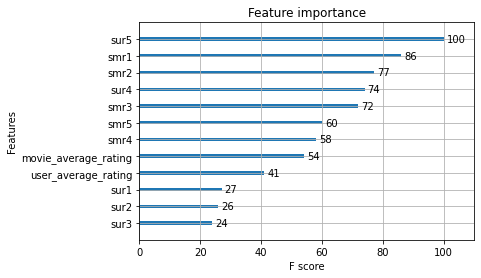

In [84]:
xgb.plot_importance(xgbr)
plt.show()

In [85]:
#store errors in dictionary
errors = dict()
errors['features_13'] = get_error_metrics(y_test, predicted)

In [86]:
errors

{'features_13': (0.9970299276956132, 30.5458664894104)}

Surprise Baseline Model

In [87]:
from surprise import BaselineOnly

In [88]:
bsl_options = {'method': 'sgd', 'learning_rate':0.001}
bsl_algo = BaselineOnly(bsl_options=bsl_options)

In [89]:
bsl_algo.fit(trainset=trainset)

Estimating biases using sgd...


In [90]:
test_prediction = bsl_algo.test(testset=testset)

In [95]:
#function to return actual and predicted rating using baselineonly
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

In [96]:
#function to return errors for baseline
def get_errors(predictions):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

In [97]:
#errors on test dataset
get_errors(test_prediction)

(1.0498214395382153, 35.952841526481826)

In [98]:
errors['baseline'] = get_errors(test_prediction)

In [106]:
#getting new feature as predicted_bslpr_test for again xgboost for test dataset
actual_bslpr_test, predicted_bslpr_test = get_ratings(test_prediction)

In [104]:
#getting new feature as predicted_bslpr_test for again xgboost for train dataset
actual_bslpr_train, predicted_bslpr_train = get_ratings(bsl_algo.test(trainset.build_testset()))

Merge baseline predicted ratings with test and train data

In [107]:
train_reg['bslpr'] = predicted_bslpr_train
test_reg['bslpr'] = predicted_bslpr_test

In [109]:
#again train xgboost with 14 features
x_train = train_reg.drop(['user_id', 'movie_id', 'rating'], axis=1)
y_train = train_reg['rating']
x_test = test_reg.drop(['user_id', 'movie_id', 'rating'], axis=1)
y_test = test_reg['rating']

xgbr1 = xgb.XGBRegressor(silent=True)
xgbr1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [110]:
predicted1 = xgbr1.predict(x_test)

In [111]:
#get errors
get_error_metrics(y_test, predicted1)

(0.9890911799474242, 30.293679237365723)

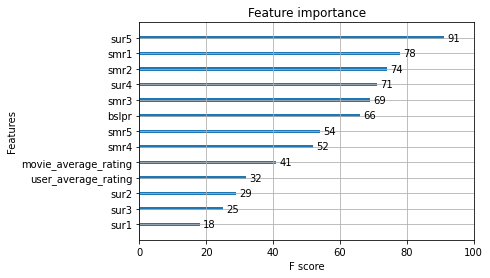

In [112]:
#feature importance
xgb.plot_importance(xgbr1)
plt.show()

Matrix Factorization:


*   SVD(single value decomposition)



In [113]:
from surprise import SVD

In [114]:
svd = SVD(n_factors=100, biased=True, random_state=15)
svd.fit(trainset)

In [115]:
test_prediction = bsl_algo.test(testset=testset)

In [116]:
#errors on test dataset
get_errors(test_prediction)

(1.0498214395382153, 35.952841526481826)

In [117]:
errors['svd'] = get_errors(test_prediction)

In [118]:
errors

{'baseline': (1.0498214395382153, 35.952841526481826),
 'features_13': (0.9970299276956132, 30.5458664894104),
 'svd': (1.0498214395382153, 35.952841526481826)}

Conculsion:

> Among all feature_13, baseline and svd, feature_13(xgboost with 13 features) is the best performing model with higest root mean square error and mean absolute percentage error.

